# Budget Analysis

---

## Environment Setup

In [58]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path

%matplotlib inline

In [59]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [60]:
# Set environment variables from the .env file
env_path = Path("/Users/GrantDePalma")/'.env'
load_dotenv(env_path)

True

In [61]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

In [62]:
type(PLAID_CLIENT_ID)

str

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [63]:
# Create the client object
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

# Get institutions
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',


In [64]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [65]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-d4c2a5ea-30b2-4374-9bb9-f4f20c1113c8', 'request_id': 'qxzSeTeYmEmk8zT'}


### 3. Exchange the public token for an access token

In [66]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Print the access token
print(exchange_response)


{'access_token': 'access-sandbox-1a4f84a4-8042-4720-b8cc-46246c3e4a22', 'item_id': 'NWkQ6rwE3MIoDAygEAVqIyZBJ93bp3tWDAKP5', 'request_id': 'gIQPwfzPerc1zXj'}


In [67]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [68]:
# Retrieve accounts
client.Accounts.get(access_token)
# Print accounts

{'accounts': [{'account_id': 'oApgQwXzkWCbqQgJ9Q4WFBdl36o3L6CRzaWRl',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'g1jedmAgLNFw5X71yXdJSZo1WnqWyntgwbvgb',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '8zBLA9wr8vClKx1QLxMzfKJEMnxMjncwGAkwn',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [36]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)
# Print the transactions
transaction_json = pretty_print_response(transaction_response['transactions'])

[
    {
        "account_id": "Rqe8V1knLpfVgZgoK7RPid5KNoxKAJtRbbjvl",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-05-25",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

In [37]:
client.Income.get(access_token)

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'MavMUbcwRHnN8Fj'}

### 2. Print the categories for each transaction

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [70]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)
# Define an empty DataFrame and set the columns as date, name, amount, and category
df = pd.DataFrame(columns=['date', 'name','amount', 'category_id', 'category'])
dates = []
names = []
amounts = []
category_ids=[]
categories = []
# Retrieve all the transactions
for transactions in transaction_response['transactions']:
    dates.append(transactions['date'])
    names.append(transactions['name'])
    amounts.append(transactions['amount'])
    categories.append(transactions['category'][0])
df['date'] = dates
df['name'] = names
df['amount'] = amounts
df['category'] = categories
   

# Display data types
df['date'] = pd.to_datetime(df['date'])
# Populate the transactions DataFrame with the transactions data
# Set the date column as index
df.set_index(df['date'], inplace=True)
# Display sample data
df.drop(columns=['date'], inplace=True)

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [71]:
# Fetch de income data
# Display sample data from the DataFrame    
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
income_response = client.Income.get(access_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '2DiSvkW09a04fR6'}

In [72]:
# Determine the previous year's gross income and print the results
gross_income_last_yr = income_response['income']['last_year_income']
gross_income_last_yr

6000

In [73]:
# Determine the current monthly income and print the results
monthly_income = income_response['income']['income_streams']
monthly_income

[{'confidence': 0.99,
  'days': 690,
  'monthly_income': 500,
  'name': 'UNITED AIRLINES'}]

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [74]:
# Compute the total expenses per category
expenses = df.groupby('category').sum()['amount']
# Display the expenses per catefory
expenses_df = pd.DataFrame(expenses)
expenses_df.drop(expenses_df.loc[expenses_df['amount']<=0].index, inplace=True)
expenses_df

,amount
category,
Food and Drink,7634.38
Payment,14699.50
Recreation,471.00
Shops,3500.00
Transfer,41074.68
Travel,70.38


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021453DE0DC8>],
      dtype=object)

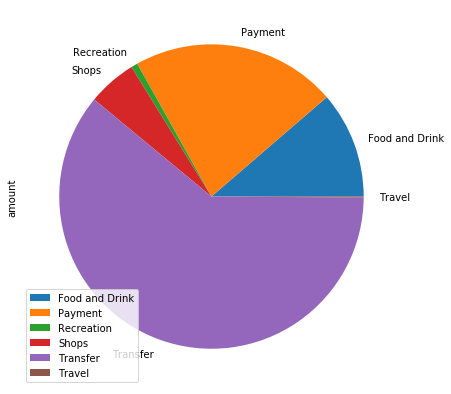

In [76]:
expenses_df.plot(kind='pie', figsize=[7,7], subplots=True)

### Calculate the expenses per month

In [86]:
# Create a DataFrame with the total expenses
expenses_by_mo = df.groupby(df.index.month)['amount'].sum()
# Display sample data
expenses_by_mo

date
1     11145.24
2     10145.24
3     11145.24
4     10645.24
5     10138.91
11     3584.83
12    10645.24
Name: amount, dtype: float64

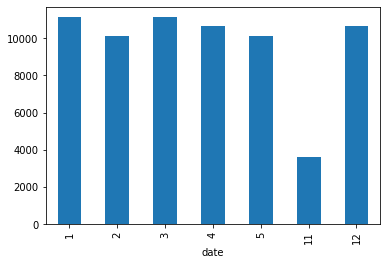

In [87]:
# Create a spending per month bar chart
expenses_by_mo.plot(kind='bar')